In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import uniform

In [2]:
x = np.array([i for i in range(5)])
y = np.array([i for i in range(5)])

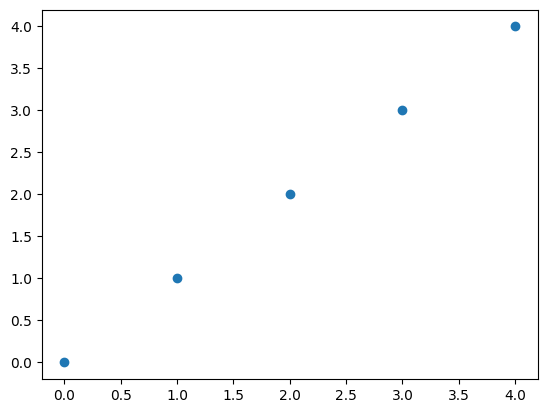

In [3]:
plt.scatter(x, y)

In [4]:
ws = np.array([round(uniform(-1, 1), 3) for i in range(2)])
ws

array([0.662, 0.552])

In [5]:
def hipotesi(w0, w1, x):
    return w0 + w1*x

In [6]:
hipotesi(ws[0], ws[1], x)

array([0.662, 1.214, 1.766, 2.318, 2.87 ])

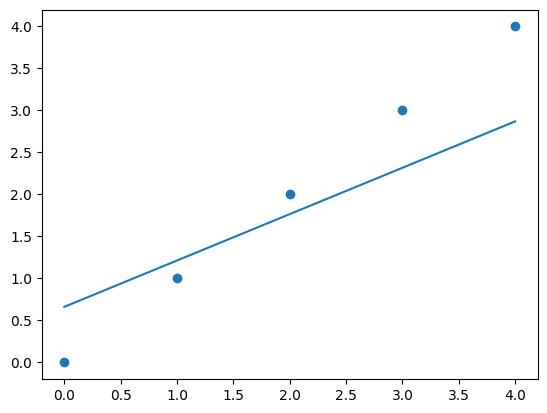

In [7]:
plt.scatter(x, y)
plt.plot(x, hipotesi(ws[0], ws[1], x))

---

In [8]:
ws # altezza e angolazione

array([0.662, 0.552])

In [9]:
def MSE(w0, w1, x, y):
    return (hipotesi(w0, w1, x) - y)**2

print(MSE(ws[0], ws[1], x, y))
print(np.sum(MSE(ws[0], ws[1], x, y)) / len(x))

[0.438244 0.045796 0.054756 0.465124 1.2769  ]
0.4561639999999999


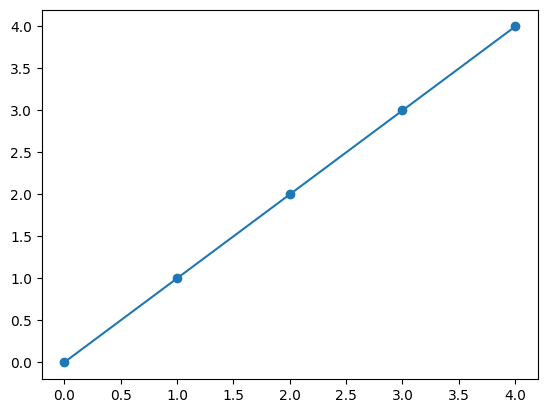

In [10]:
def gradiente(w0, w1, x, y, alpha=0.1, epocas=200):
    custo = []
    for i in range(epocas):
        erroW0 = np.sum(hipotesi(w0, w1, x) - y)
        erroW1 = np.sum((hipotesi(w0, w1, x) - y) * x)
        custo.append(erroW1)

        w0 = w0 - alpha * (1/len(x)) * erroW0
        w1 = w1 - alpha * (1/len(x)) * erroW1

    return w0, w1, custo

ws[0], ws[1], custo = gradiente(ws[0], ws[1], x, y)
plt.scatter(x, y)
plt.plot(x, hipotesi(ws[0], ws[1], x))

In [11]:
print(np.sum(MSE(ws[0], ws[1], x, y)) / len(x))

9.724117058643702e-07


In [12]:
hipotesi(ws[0], ws[1], 5)

4.998715849646571

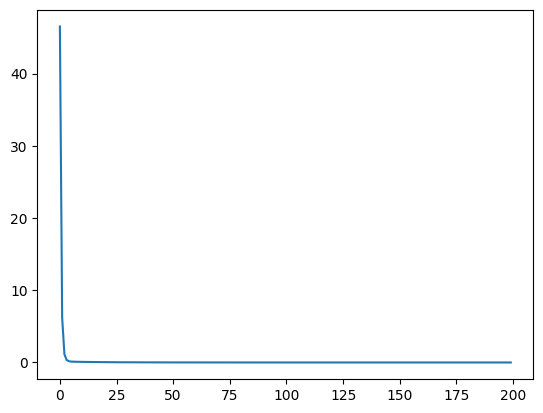

In [13]:
custo = np.array(custo)
plt.plot([i for i in range(200)], custo**2)

---

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [68]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 6, 6, 7, 8, 4, 10],
                   'y': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})